In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from ApiKey import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thornhill
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | virginia beach
Processing Record 11 of Set 1 | tsabong
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | ingham
Processing Record 14 of Set 1 | grand centre
City not found. Skipping...
Processing Record 15 of Set 1 | aubergenville
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | carupano
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | thompson
Processi

Processing Record 34 of Set 4 | mazagao
Processing Record 35 of Set 4 | lorengau
Processing Record 36 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 37 of Set 4 | antofagasta
Processing Record 38 of Set 4 | byron bay
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | kati
Processing Record 41 of Set 4 | hay river
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | vilyuysk
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | nueva concepcion
Processing Record 46 of Set 4 | beyneu
Processing Record 47 of Set 4 | praia
Processing Record 48 of Set 4 | henties bay
Processing Record 49 of Set 4 | saint augustine
Processing Record 0 of Set 5 | sur
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | cayambe
Processing Record 4 of Set 5 | zapolyarnyy
Processing Record 5 of Set 5 | colares
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | 

Processing Record 32 of Set 8 | mocuba
Processing Record 33 of Set 8 | teguldet
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | monkey bay
Processing Record 36 of Set 8 | saint-leu
Processing Record 37 of Set 8 | corner brook
Processing Record 38 of Set 8 | praia da vitoria
Processing Record 39 of Set 8 | tiksi
Processing Record 40 of Set 8 | lalin
Processing Record 41 of Set 8 | nador
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | dongying
Processing Record 44 of Set 8 | aksarka
Processing Record 45 of Set 8 | miles city
Processing Record 46 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 8 | nantucket
Processing Record 48 of Set 8 | ambilobe
Processing Record 49 of Set 8 | fort smith
Processing Record 0 of Set 9 | lakes entrance
Processing Record 1 of Set 9 | kuna
Processing Record 2 of Set 9 | janakpur road
City not found. Skipping...
Processing Record 3 of Set 9 | vytegra
Processing Record 4 of Se

Processing Record 25 of Set 12 | jidong
Processing Record 26 of Set 12 | lewistown
Processing Record 27 of Set 12 | cooma
Processing Record 28 of Set 12 | yining
Processing Record 29 of Set 12 | ponta delgada
Processing Record 30 of Set 12 | arras
Processing Record 31 of Set 12 | baihar
Processing Record 32 of Set 12 | marsh harbour
Processing Record 33 of Set 12 | berdsk
Processing Record 34 of Set 12 | tra vinh
Processing Record 35 of Set 12 | watertown
Processing Record 36 of Set 12 | kjopsvik
Processing Record 37 of Set 12 | salinas
Processing Record 38 of Set 12 | mathbaria
Processing Record 39 of Set 12 | warrnambool
Processing Record 40 of Set 12 | aswan
Processing Record 41 of Set 12 | ekhabi
Processing Record 42 of Set 12 | oktyabrskiy
Processing Record 43 of Set 12 | goundi
Processing Record 44 of Set 12 | prien
Processing Record 45 of Set 12 | matagami
Processing Record 46 of Set 12 | yei
Processing Record 47 of Set 12 | parana
Processing Record 48 of Set 12 | le mars
Proces

In [42]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [43]:
# Display the City Data Frame
city_data_pd.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thornhill,55.23,-3.77,50.00,61,20,9.17,GB,1586194953
1,provideniya,64.38,-173.30,-0.22,85,94,5.66,RU,1586195097
2,saskylakh,71.92,114.08,19.90,97,99,3.98,RU,1586195238
3,nikolskoye,59.70,30.79,36.00,86,90,4.47,RU,1586195238
4,faanui,-16.48,-151.75,82.80,76,11,12.35,PF,1586195239


# Latitude Vs Temp Plot

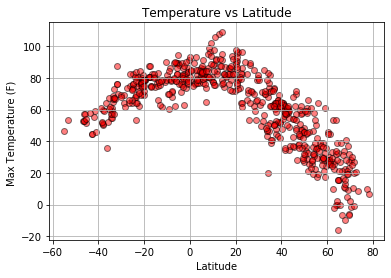

In [44]:

plt.scatter(lats, max_temps, marker="o", facecolors="red", edgecolors="black", alpha=0.5)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F) ")
plt.title("Temperature vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("temp.png")

    

plt.show()


# Humidity vs Latitude Plot

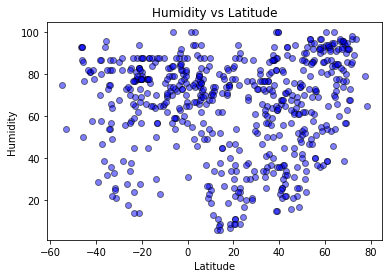

In [45]:
plt.scatter(lats, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")

plt.show()

# Windspeed Vs Latitude Plot

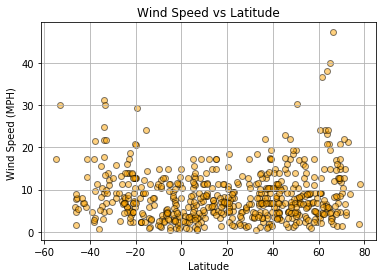

In [46]:
plt.scatter(lats, wind_speed, marker="o", facecolors="orange", edgecolors="black", alpha=0.5)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH) ")
plt.title("Wind Speed vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windspeed.png")


plt.show()

# Cloudiness Vs Cloudiness Plot

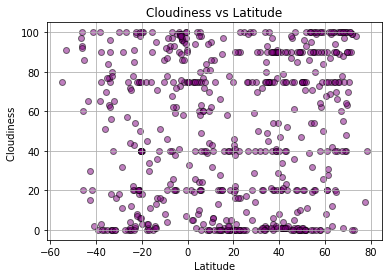

In [47]:
plt.scatter(lats, cloudiness, marker="o", facecolors="purple", edgecolors="black", alpha=0.5)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")
plt.title("Cloudiness vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cloudiness.png")


plt.show()

In [48]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

# Linear Regression

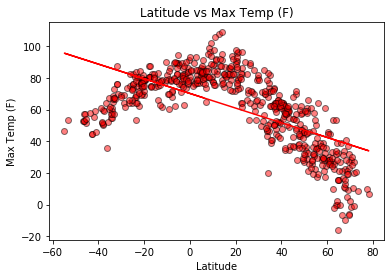

In [49]:
linear_scatter(lats, max_temps, "Max Temp (F)")


In [50]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

# Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8837704111229652


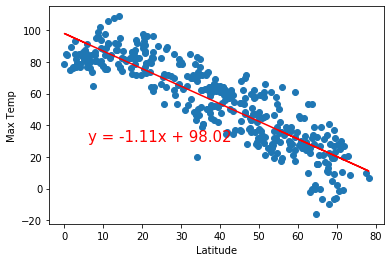

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.7535362845846


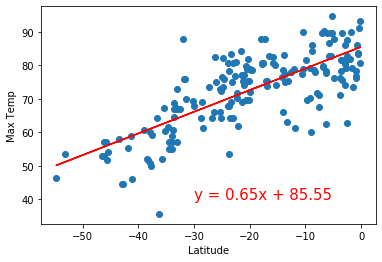

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))


The high r value indicates a strong positive correlation between latitude and max temperature.

# Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27165021000079964


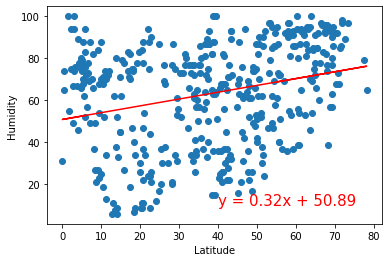

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.12481877540273799


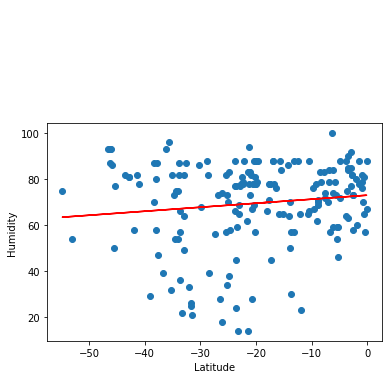

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude.

# Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23362803112547426


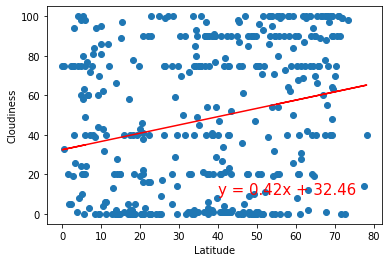

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.16514475046477098


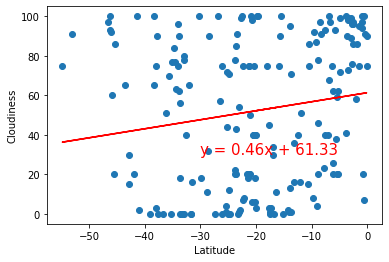

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

# Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21086621332877842


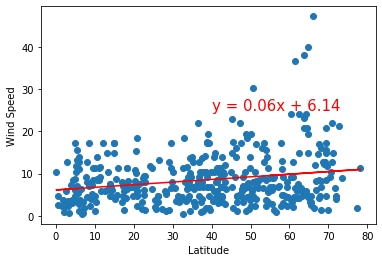

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.2920932014705921


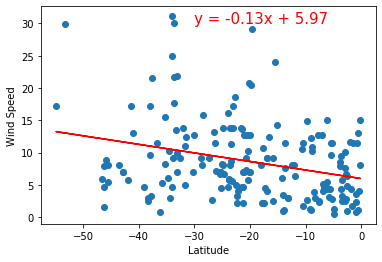

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.